In [1]:
setwd('/import/jliu//data2/')

In [2]:
load('ss.rda')

In [3]:
head(ss,2)
head(group,2)

,M1_CI10,M1_CI11,M1_CI12,M1_CI13,M1_CI14,M1_CI15,M1_CI16,M1_CI17,M1_CI18,M1_CI19,...,M2_CI16,M2_CI1,M2_CI2,M2_CI3,M2_CI4,M2_CI5,M2_CI6,M2_CI7,M2_CI8,M2_CI9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,0.3303504090,4.095461e-01,3.006813e-01,1.612970e-01,0.2506959125,3.016214e-01,1.935692e-01,2.395665e-01,2.726742e-01,2.073234e-01,...,1.953716e-01,0.3252166237,1.891762e-01,0.1714668490,4.722989e-01,2.898339e-01,2.898339e-01,2.520501e-01,1.065083e-01,0.1696711927
A1CF,-0.0001050488,-5.554548e-05,-8.194734e-05,-5.842304e-05,-0.0001028343,-3.493711e-06,-6.220539e-05,-7.141915e-05,-5.430027e-05,-8.330878e-05,...,1.311857e-05,0.0001777964,4.465383e-05,0.0001067074,5.912063e-06,6.066763e-05,8.710035e-05,5.945237e-05,9.242296e-05,0.0001151915


[1] "subtype1" "subtype1"

In [4]:
library(IOBR)

Loading required package: tibble

Warning message:
"package 'tibble' was built under R version 4.2.3"
Loading required package: dplyr


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Loading required package: ggpubr

Warning message:
"package 'ggpubr' was built under R version 4.2.3"
Loading required package: survival

Warning message:
"package 'survival' was built under R version 4.2.3"
Loading required package: ComplexHeatmap

Loading required package: grid

ComplexHeatmap version 2.14.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either o

In [5]:
expr_coad = ss

In [6]:
im_ssgsea <- deconvo_tme(eset = expr_coad,
                        method = "cibersort",
                        arrays = F
                        )


>>> Running CIBERSORT



In [7]:
save(im_ssgsea,file = 'cibersort2.rda')

In [13]:
library(dplyr)

In [14]:
#im_ssgsea2 = im_ssgsea %>% dplyr::select(-group) 

In [15]:
im_ssgsea2 = im_ssgsea

In [16]:
group1 = read.csv('./resultstrain3/resultstrain3.k=2.consensusClass.csv',header =F)
group1$V2 = paste0('subtype',group1$V2)
colnames(group1) = c('ID','group')
count = dplyr::left_join(group1,im_ssgsea2,by = 'ID')

In [17]:
library(tidyHeatmap)
library(tidyverse)
library(RColorBrewer)

In [18]:
pre = count[,c('ID','group')]

In [19]:
colnames(count)

[1] "ID"                                    
 [2] "group"                                 
 [3] "B_cells_naive_CIBERSORT"               
 [4] "B_cells_memory_CIBERSORT"              
 [5] "Plasma_cells_CIBERSORT"                
 [6] "T_cells_CD8_CIBERSORT"                 
 [7] "T_cells_CD4_naive_CIBERSORT"           
 [8] "T_cells_CD4_memory_resting_CIBERSORT"  
 [9] "T_cells_CD4_memory_activated_CIBERSORT"
[10] "T_cells_follicular_helper_CIBERSORT"   
[11] "T_cells_regulatory_(Tregs)_CIBERSORT"  
[12] "T_cells_gamma_delta_CIBERSORT"         
[13] "NK_cells_resting_CIBERSORT"            
[14] "NK_cells_activated_CIBERSORT"          
[15] "Monocytes_CIBERSORT"                   
[16] "Macrophages_M0_CIBERSORT"              
[17] "Macrophages_M1_CIBERSORT"              
[18] "Macrophages_M2_CIBERSORT"              
[19] "Dendritic_cells_resting_CIBERSORT"     
[20] "Dendritic_cells_activated_CIBERSORT"   
[21] "Mast_cells_resting_CIBERSORT"          
[22] "Mast_cells_activated_CIBERSORT"        
[23] "Eosinophils_CIBERSORT"                 
[24] "Neutrophils_CIBERSORT"                 
[25] "P-value_CIBERSORT"                     
[26] "Correlation_CIBERSORT"                 
[27] "RMSE_CIBERSORT"

In [20]:
ncol = dim(count)[2]-2
acp = count[3:ncol]

In [21]:
acp = acp[,which(colSums(acp) > 0)]
acp

B_cells_naive_CIBERSORT,B_cells_memory_CIBERSORT,Plasma_cells_CIBERSORT,T_cells_CD8_CIBERSORT,T_cells_CD4_naive_CIBERSORT,T_cells_CD4_memory_resting_CIBERSORT,T_cells_CD4_memory_activated_CIBERSORT,T_cells_regulatory_(Tregs)_CIBERSORT,T_cells_gamma_delta_CIBERSORT,NK_cells_resting_CIBERSORT,Monocytes_CIBERSORT,Macrophages_M0_CIBERSORT,Dendritic_cells_resting_CIBERSORT,Dendritic_cells_activated_CIBERSORT,Mast_cells_resting_CIBERSORT,Eosinophils_CIBERSORT,Neutrophils_CIBERSORT
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.000000e+00,0.0103237879,0.0006285105,0.100431733,0.0449920940,0.101638011,0.080386706,0.0000000000,0.017117370,0.14778702,0.15941560,0.000000000,0.000000000,2.677630e-03,0.022254560,0.0000000000,0.3123470
0.000000e+00,0.0274195674,0.0000000000,0.031967567,0.0526917974,0.010097604,0.027744643,0.0000000000,0.027552218,0.04153454,0.10554920,0.000000000,0.000000000,9.890066e-03,0.045614665,0.0000000000,0.6199381
1.301267e-02,0.0000000000,0.0009637052,0.182700491,0.1002589111,0.002554576,0.038027000,0.0000000000,0.000000000,0.16763114,0.14590566,0.000000000,0.000000000,0.000000e+00,0.000000000,0.0000000000,0.3489458
5.957376e-03,0.0000000000,0.0000000000,0.051879513,0.0509727823,0.017440932,0.031821527,0.0158838701,0.000000000,0.09616703,0.14824482,0.005166048,0.000000000,0.000000e+00,0.013081315,0.0000000000,0.5633848
0.000000e+00,0.0167570080,0.0000000000,0.018856968,0.1107163605,0.099516882,0.026708140,0.0000000000,0.000000000,0.03407035,0.14684716,0.000000000,0.000000000,2.073848e-03,0.024270396,0.0000000000,0.5201829
3.360324e-02,0.0000000000,0.0014245906,0.083904813,0.1007360650,0.128404309,0.080569757,0.0000000000,0.060477063,0.16170249,0.07160309,0.000000000,0.006921113,2.219762e-03,0.005605944,0.0221175442,0.2407102
2.469008e-02,0.0002712795,0.0000000000,0.146277041,0.0603994798,0.000000000,0.017909587,0.0485985917,0.000000000,0.06290018,0.29289898,0.031511735,0.000000000,7.323480e-03,0.000000000,0.0008807352,0.3063388
0.000000e+00,0.0019856647,0.0000000000,0.077514666,0.0652641968,0.093122527,0.001077606,0.0024360740,0.000000000,0.11419488,0.11816072,0.000000000,0.000000000,0.000000e+00,0.024980154,0.0000000000,0.5012635
9.257444e-04,0.0000000000,0.0000000000,0.049822613,0.0116025219,0.000000000,0.064757965,0.0000000000,0.017369216,0.04669661,0.17815113,0.028898314,0.000000000,1.503612e-03,0.019312126,0.0000000000,0.5809601


In [22]:
cc = cbind(pre,acp)

In [23]:
cibersort_long <- cc %>% 
  select(ID,everything()) %>% 
  pivot_longer(- c(1:4),names_to = "cell_type",values_to = "fraction") %>% 
  dplyr::mutate(cell_type = gsub("_CIBERSORT","",cell_type),
                cell_type = gsub("_"," ",cell_type))

In [24]:
library(IOBR)

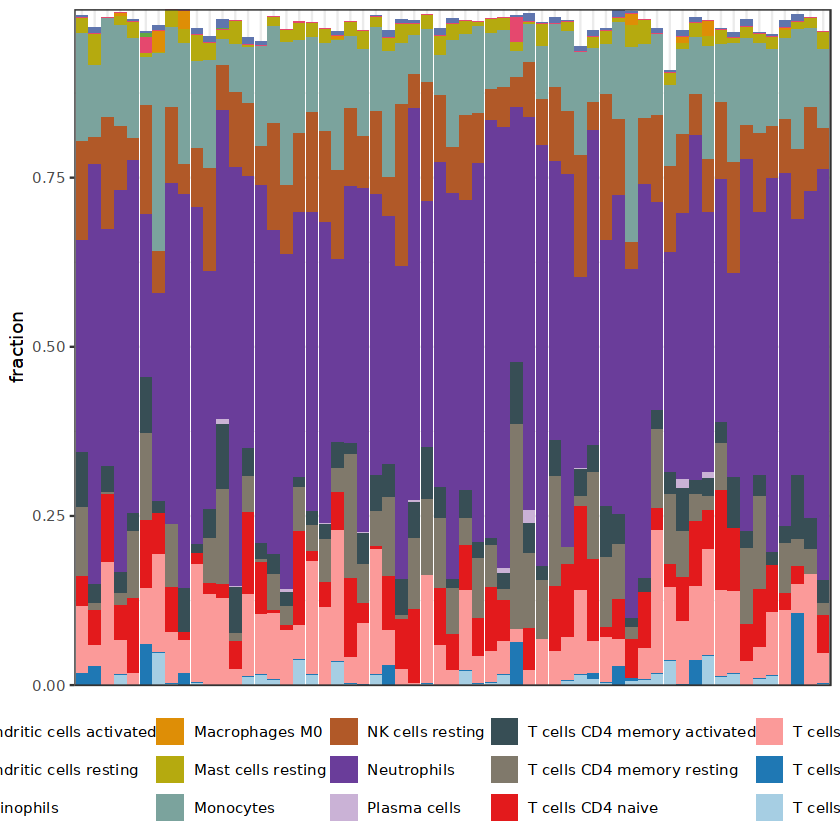

In [25]:
p1 <- cibersort_long %>% 
  ggplot(aes(ID,fraction))+
  geom_bar(stat = "identity",position = "stack",aes(fill=cell_type))+
  labs(x=NULL)+
  scale_y_continuous(expand = c(0,0))+
  scale_fill_manual(values = palette4,name=NULL)+ # iobr还给大家准备了几个色盘，贴心！
  theme_bw()+
  theme(axis.text.x = element_blank(),
        axis.ticks.x = element_blank(),
        legend.position = "bottom"
        )
p1

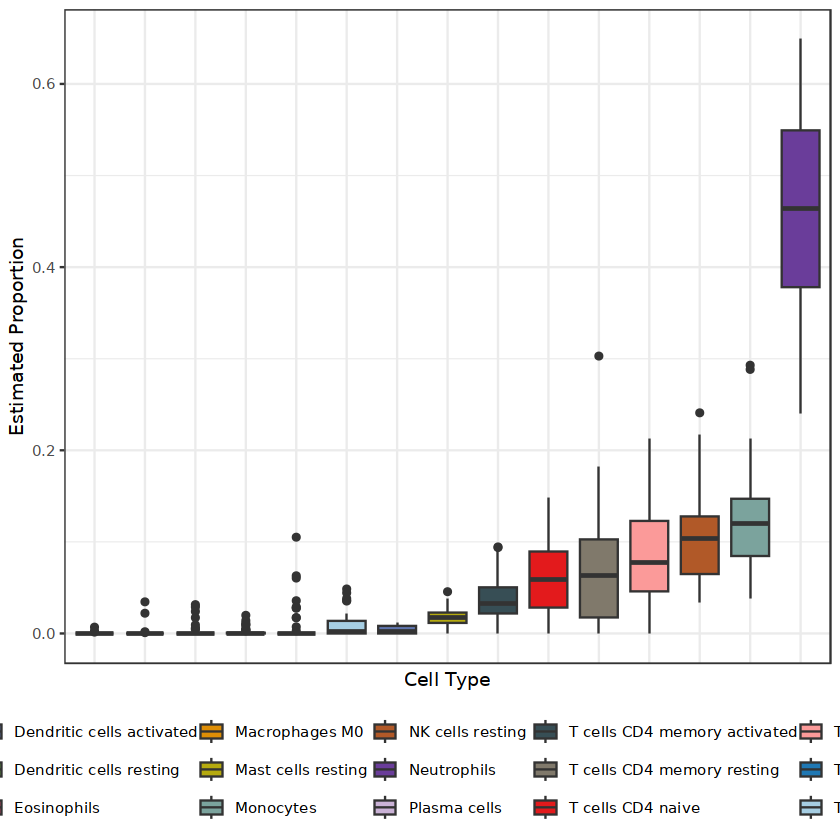

In [26]:
library(forcats)

p2 <- ggplot(cibersort_long,aes(fct_reorder(cell_type, fraction),fraction,fill = cell_type)) + 
  geom_boxplot() + 
  #geom_jitter(width = 0.2,aes(color=cell_type))+
  theme_bw() + 
  labs(x = "Cell Type", y = "Estimated Proportion") +
  theme(axis.text.x = element_blank(),
        axis.ticks.x = element_blank(),
        legend.position = "bottom") + 
  scale_fill_manual(values = palette4)
p2

In [27]:
options(repr.plot.width = 12)

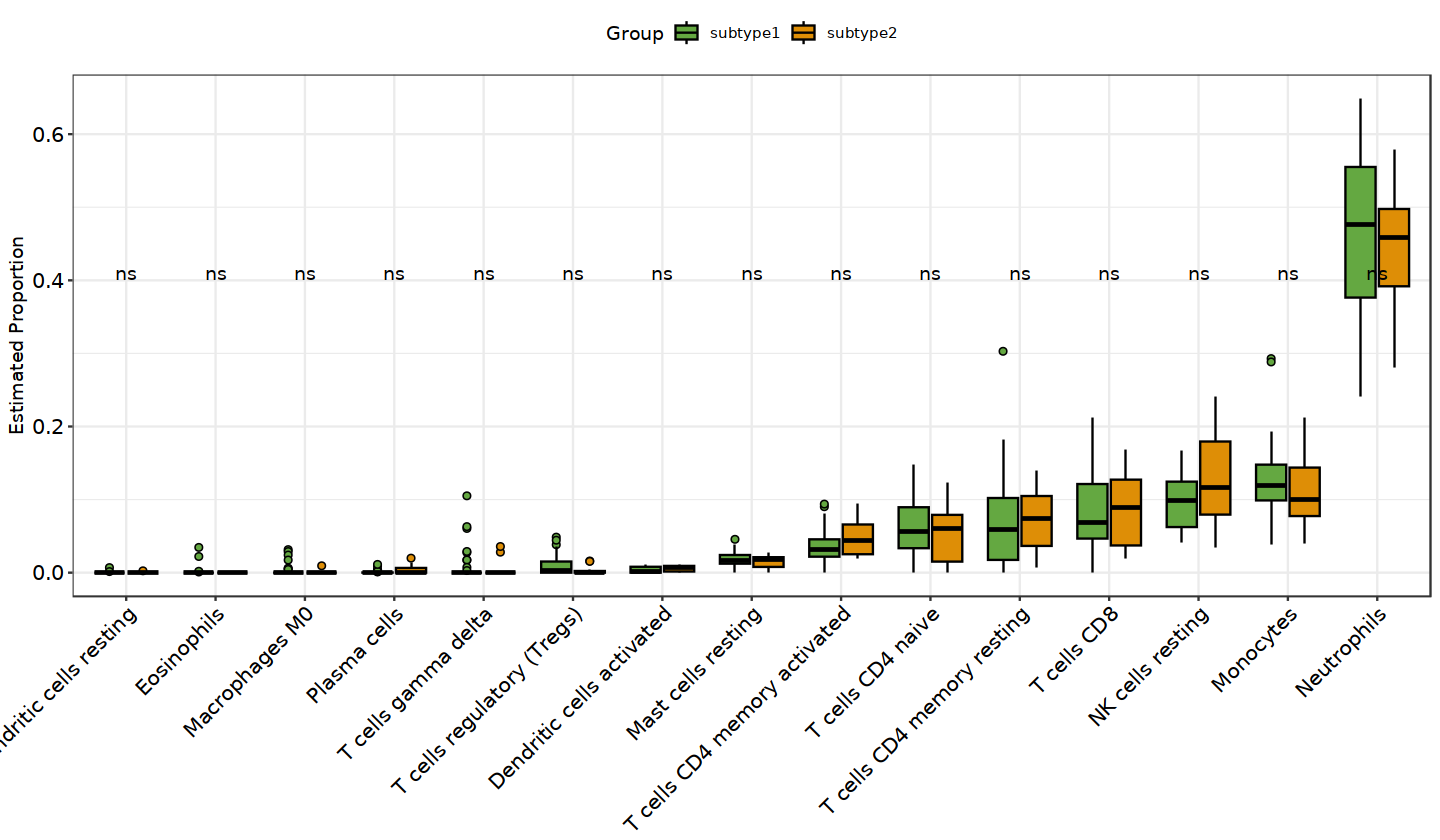

In [28]:
library(ggpubr)
library(stringr)

# 分组
cibersort_long$Group = cibersort_long$group

p3 <- ggplot(cibersort_long,aes(fct_reorder(cell_type,fraction),fraction,fill = Group)) + 
  geom_boxplot(outlier.shape = 21,color = "black") + 
  scale_fill_manual(values = palette1[c(2,4)])+ 
  theme_bw() + 
  labs(x = NULL, y = "Estimated Proportion") +
  theme(legend.position = "top") + 
  theme(axis.text.x = element_text(angle=45,hjust = 1),
        axis.text = element_text(color = "black",size = 12))+
  stat_compare_means(aes(group = Group,label = ..p.signif..),
                     method = "kruskal.test",label.y = 0.4)
p3